# PCA analysis of VAE latent space
Compare latent spaces between several VAE models for continious variables.

In [1]:
import os
import numpy as np
from specvae.model import BaseModel
import specvae.dataset as dt
import specvae.utils as utils

In [2]:
# Parameters
dataset = "MoNA"
model_name = "betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)"
model_dir = "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)"


In [3]:
# Parameters
dataset = "MoNA"
# dataset = "HMDB"
model_dirs = [
    # HMDB
    ## BetaVAE
    ### Best:
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-200-50-2-50-200-400-20_01 (24-12-2021_19-40-39)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-2-1600-20_02 (24-12-2021_18-27-38)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-2-90-100-20_03 (24-12-2021_20-30-13)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-90-2-90-100-20_04 (24-12-2021_19-24-07)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-2-100-400-20_05 (24-12-2021_19-09-29)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-90-2-100-20_06 (24-12-2021_20-58-10)",
    ### Beta:
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_01 (25-12-2021_00-55-14)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_02 (25-12-2021_00-54-51)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_03 (25-12-2021_01-06-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_04 (25-12-2021_01-07-02)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_05 (25-12-2021_00-45-49)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-2-50-200-1600-100_06 (25-12-2021_00-48-55)",
    ### BetaVAE and FactorVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_01 (24-12-2021_23-54-27)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_02 (24-12-2021_23-54-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-1600-100_03 (25-12-2021_00-03-53)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-2-800-100_04 (25-12-2021_02-25-04)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-2-100-1600-100_05 (25-12-2021_01-17-18)",
    # "d:\\Workspace\\SpecVAE\\.model\\HMDB\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-200-100-2-200-100_06 (25-12-2021_02-14-20)",

    ## JointVAE
    ### Best:



    # MoNA
    ## BetaVAE
    ### Best
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-200-50-3-50-200-800-20_01 (24-12-2021_01-50-12)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-400-100-3-400-20_02 (24-12-2021_03-34-34)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-1600-3-1600-20_03 (24-12-2021_00-17-31)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-800-3-800-20_04 (24-12-2021_00-25-10)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_20-100-3-90-100-20_05 (24-12-2021_03-01-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\best\\betavae_capacity_50-400-3-100-400-50_06 (24-12-2021_06-19-49)"
    ### Beta
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_01 (24-12-2021_09-13-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_02 (24-12-2021_09-15-11)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_03 (24-12-2021_09-29-26)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_04 (24-12-2021_09-29-36)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_05 (24-12-2021_09-06-14)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\beta\\betavae_capacity_100-1600-200-50-3-50-200-1600-100_06 (24-12-2021_09-05-10)",
    ### BetaVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_01 (24-12-2021_11-06-17)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-800-100-3-800-100_02 (24-12-2021_10-59-29)",
    "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-400-100_05 (24-12-2021_10-57-01)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\betavae_score\\betavae_capacity_100-400-100-3-100-400-100_06 (24-12-2021_08-41-33)",
    ### FactorVAE Score
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-100-90-50-3-50-90-100-100_01 (24-12-2021_09-48-37)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-1600-100_02 (24-12-2021_10-51-41)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-800-100-3-800-100_03 (24-12-2021_11-16-41)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-3-1600-100_04 (24-12-2021_08-02-44)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-400-200-50-3-50-200-400-100_05 (24-12-2021_09-23-23)",
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\betavae_capacity_nextron\\factorvae_score\\betavae_capacity_100-1600-100-3-100-1600-100_06 (24-12-2021_08-25-38)",

    ## JointVAE
    ### Best:
    # "d:\\Workspace\\SpecVAE\\.model\\MoNA\\jointvae_capacity_nextron\\jointvae_capacity_100-200-3-200-100_05 (25-12-2021_21-42-54)",
    
]

## Load model

In [4]:
device, cpu = utils.device(use_cuda=False)

Device in use:  cpu


In [5]:
def load_model(path):
    model_path = os.path.join(path, 'model.pth')
    model = BaseModel.load(model_path, device)
    model.eval()
    return model

## Load and transform data

In [6]:
if dataset == 'MoNA':
    labels = ['ionization_mode_id', 'collision_energy', 'total_exact_mass', 'precursor_mz', 'instrument_id', 'instrument_type_id', 'precursor_type_id', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'MoNA'
    metadata_path = base_path / 'MoNA_meta.npy'
elif dataset == 'HMDB':
    labels = ['ionization_mode_id', 'collision_energy', 'superclass_id', 'class_id']
    base_path = utils.get_project_path() / '.data' / 'HMDB'
    metadata_path = base_path / 'HMDB_meta.npy'

metadata = None
if os.path.exists(metadata_path):
    metadata = np.load(metadata_path, allow_pickle=True).item()

df_all = dt.Spectra.open(base_path / ('%s_full.csv' % dataset))

In [7]:
def load_vis_data(target_column):
    data_path = base_path / ('visualization_%s.csv' % target_column)
    df = dt.Spectra.open(data_path)
    return df

In [8]:
def preload_data_as_tensor(model, df, n=-1):
    columns = model.config['input_columns']
    types = model.config['types']
    data = dt.Spectra.preload_tensor(
        device=device, data_frame=df[columns + ['id']], transform=model.transform, limit=n, types=types, do_print=False)
    return data

In [9]:
from specvae.vae import SpecVEA
from specvae.jointvae import JointVAE

def evaluate_model(model, df, data):
    print("Encode N=%d instances from %s dataset..." % (data['id'].shape[0], dataset))
    X, ids = data['spectrum'], data['id'] # TODO: handle the case for concatanated input
    Xrecon, z, latent_dist = model.forward_(X)
    print(z.shape)
    data_np = {}
    data_np['model_type'] = 'betavae' if isinstance(model, SpecVEA) else 'jointvae'
    data_np['X'] = X.data.cpu().numpy()
    data_np['Xrecon'] = Xrecon.data.cpu().numpy()
    data_np['z'] = z.data.cpu().numpy()
    data_np['ids'] = ids
    data_np['ionization_mode_id'] = df['ionization_mode_id'].to_numpy()
    data_np['collision_energy'] = df['collision_energy'].to_numpy()
    if 'total_exact_mass' in df:
        data_np['total_exact_mass'] = df['total_exact_mass'].to_numpy()
    # data_np['images'] = df['images'].to_numpy()
    return data_np


## Prepare data for vizualization

In [10]:
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(24,20)})

import torchvision as tv
import specvae.vae as vae, specvae.utils as utils
import plotly.io as pio
pio.renderers.default='notebook'
import plotly.express as px
import pandas as pd

In [11]:
def get_colors(df, data_np):
    colors = {}
    colors['ionization_mode_id'] = np.array(list(map(lambda x: 'negative' if x==0 else 'positive', data_np['ionization_mode_id'].tolist())))
    colors['collision_energy'] = data_np['collision_energy']
    colors['superclass_id'] = df['superclass'].to_numpy()
    df['class'] = df['class'].fillna('Undefined')
    colors['class_id'] = df['class'].to_numpy()
    if dataset == 'MoNA':
        df['precursor_type'] = df['precursor_type'].fillna('Undefined')
        colors['precursor_type_id'] = df['precursor_type'].to_numpy()
        df['instrument_type'] = df['instrument_type'].fillna('Undefined')
        colors['instrument_type_id'] = df['instrument_type'].to_numpy()
        df['instrument'] = df['instrument'].fillna('Undefined')
        colors['instrument_id'] = df['instrument'].to_numpy()
        colors['total_exact_mass'] = df['total_exact_mass'].to_numpy()
        colors['precursor_mz'] = df['precursor_mz'].to_numpy()
    return colors

In [12]:
def compute_pca(data, n=2):
    print("Compute PCA for n_components=%d" % n)
    red = PCA(n)
    rdata = red.fit_transform(data)
    print("\t      explained_variance:", red.explained_variance_)
    print("\texplained_variance_ratio:", red.explained_variance_ratio_)
    return rdata, red

def compute_tsne(data, n=2):
    print("Compute tSNE for n_components=%d" % n)
    r = TSNE(n)
    rdata = r.fit_transform(data)
    print("TSNE:")
    print("\t      kl_divergence:", r.kl_divergence_)
    return rdata

def plot_data(data, labels=None, label_name=None, plot_components=2, 
        hover_data=None, width=1000, height=1000, title='Visualization of dataset'):
    if plot_components == 2:
        fig = px.scatter(data, x=0, y=1, color=labels, 
            template='plotly_white', hover_data=hover_data,
            title=title, width=width, height=height)
        fig.show()
    elif plot_components == 3:
        fig = px.scatter_3d(data, x=0, y=1, z=2, color=labels, 
            template='plotly_white', hover_data=hover_data, 
            title=title, width=width, height=height)
        fig.update_traces(
            marker=dict(size=3),
            selector=dict(mode='markers'))
        fig.show()

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_latent(x, y, color, scale_size=1., cmap='BrBG_r', alpha=0.8, 
    figsize=(10, 10), dpi=100, xlabel='X', ylabel='Y', xlim=None, ylim=None):
    fig = plt.figure(figsize=figsize, dpi=dpi)
    gs = fig.add_gridspec(2, 3,  width_ratios=(2, 14, 1), height_ratios=(14, 2),
        left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.05, hspace=0.05)
    ax_main = plt.subplot(gs[0, 1])
    ax_xDist = plt.subplot(gs[1, 1], sharex=ax_main)
    ax_yDist = plt.subplot(gs[0, 0], sharey=ax_main)
    ax_cbar = plt.subplot(gs[0, 2])

    sc = ax_main.scatter(x, y, s=scale_size, marker='.', c=color, cmap=cmap, alpha=alpha, edgecolors='black', linewidth=0.1)
    ax_main.xaxis.set_major_locator(plt.MaxNLocator(10))
    ax_main.yaxis.set_major_locator(plt.MaxNLocator(10))
    ax_main.set_xlim(xlim)
    ax_main.set_ylim(ylim)

    cbar = fig.colorbar(sc, cax=ax_cbar)
    cbar.ax.tick_params(labelsize=14)
    cbar.ax.yaxis.set_major_locator(plt.MaxNLocator(10))
    cbar.set_alpha(1.0)
    cbar.draw_all()

    ax_xDist.hist(x, bins=100, align='mid', density=True, lw=0.2)
    ax_xDist.set(xlabel=xlabel)
    ax_xCumDist = ax_xDist.twinx()
    ax_xCumDist.hist(x, bins=100, cumulative=True, histtype='step', density=True, color='r', align='mid')
    ax_xCumDist.tick_params('y', colors='r')
    ax_xCumDist.set_ylabel('cumulative',color='r')

    ax_yDist.hist(y, bins=100, orientation='horizontal', align='mid', density=True, lw=0.2)
    ax_yDist.set(ylabel=ylabel)
    ax_yCumDist = ax_yDist.twiny()
    ax_yCumDist.hist(y,bins=100,cumulative=True,histtype='step',density=True,color='r',align='mid',orientation='horizontal')
    ax_yCumDist.tick_params('x', colors='r')
    ax_yCumDist.set_xlabel('cumulative',color='r')

    plt.setp(ax_main.get_xticklabels(), visible=False)
    plt.setp(ax_main.get_yticklabels(), visible=False)
    return fig

In [14]:
# import itertools as it
# from functools import reduce

# X = cont_Z
# fig, axs = plt.subplots(12, 1, figsize=(10, 24))
# for a, ax in zip(it.product(range(1,3), range(1, 7)), axs.ravel()):
#     ixs = []
#     for i, y_ohe in enumerate(disc_Zs):
#         y = np.argmax(y_ohe, axis=1)
#         ixs.append(np.where(y == a[i] - 1)[0])
#     inx = reduce(np.intersect1d, ixs)
#     sns.histplot(data=X[inx], ax=ax)
#     ax.set_xlim(-7, 12)
# # plt.show()

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import matplotlib.ticker as tck
from matplotlib.lines import Line2D
from itertools import cycle, product
import itertools as it
from functools import reduce

def dicrete_plot(X, ys, labels=None, color=None, kind='hist', index_prefix='Var ',
        sunith=1.0, unith=1.0, unitv=0.5, scale=1.0, border=2.0, legend_offset=1.0, 
        enable_minor_grid=True, set_ylim=True, xlim=(-10, 10), ylim=(0, 1.5)):
    # Initial assertions:
    # ...
    # Extract labels:
    mx_, mn_ = 0., 0.
    if color is not None:
        mx_, mn_ = np.max(color), np.min(color)
        print('min, max:', mn_, mx_)

    _labels = {i: list(range(1, y.shape[1] + 1)) for i, y in enumerate(ys)}
    height = np.prod([len(l) for k, l in _labels.items()])
    # Specify GridSpec:
    widths = np.array([sunith] * len(_labels) + [6*unith])
    heights = np.array([unitv] * height + [legend_offset*unitv])
    gs_kw = dict(width_ratios=widths, height_ratios=heights)
    fig, axs = plt.subplots(
        ncols=len(widths), nrows=len(heights), subplot_kw=dict(frameon=False),
        constrained_layout=False, gridspec_kw=gs_kw, 
        figsize=(scale * widths.sum(), scale * heights.sum()))
    # Define color mappings:
    from matplotlib.cm import get_cmap
    cmaps = cycle(['Purples', 'Reds', 'Blues', 'Oranges', 'Greens', ])
    def map_disc_(items, cmap_name):
        cmap_ = get_cmap(cmap_name)
        inter_ = 0.3
        slope_ = (1. - inter_) / len(items)
        return {value: cmap_(inter_ + items.index(value) * slope_) for value in items}
    colors = {label: map_disc_(items, cmap_name) \
        for (label, items), cmap_name in zip(_labels.items(), cmaps)}
    labels_ = list(product(*list(_labels.values())))
    for r, row in enumerate(axs):
        for c, ax in enumerate(row):
            for _, spine in ax.spines.items():
                spine.set_visible(False)
            if r == len(axs) - 1:
                ax.set(xticks=[], yticks=[])
                ax.patch.set_alpha(0.)
                continue
            if c < len(_labels):
                ax.set(xticks=[], yticks=[])
                var_name = c
                var_value = labels_[r][c]
                # print(var_name)
                ax.add_patch(pch.Rectangle((0., 0.), unith, unitv, 
                    facecolor=colors[var_name][var_value], edgecolor='black', label=var_value, zorder=500))
                for _, spine in ax.spines.items():
                    spine.set_linewidth(border)
            else:
                ax.set_xlim(xlim)
                if set_ylim:
                    ax.set_ylim(ylim)
                ax.set(yticks=[])
                # ax.tick_params(grid_linestyle='solid', color='grey', zorder=0)
                if enable_minor_grid:
                    ax.tick_params(which='minor', grid_linestyle='dashed', grid_dashes=(3, 6), color='grey', zorder=0)
                    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
                # ax.grid(which='both')
                if r < len(axs) - 2:
                    ax.tick_params(labelbottom=False, length=10)
                if r == len(axs) - 2:
                    ax.tick_params(labelbottom=True)
                    ax.spines['bottom'].set_visible(True)
                cmap = get_cmap('cubehelix')
                # ax.patch.set_alpha(0.)
                var_value = labels_[r]
                ixs = []
                for i, y_ohe in enumerate(ys):
                    y = np.argmax(y_ohe, axis=1)
                    ixs.append(np.where(y == var_value[i] - 1)[0])
                inx = reduce(np.intersect1d, ixs)
                if kind == 'hist':
                    sns.histplot(data=X[inx], ax=ax, stat='density', kde=True, palette='Dark2', alpha=1.0, legend=False)
                elif kind == 'box':
                    sns.boxplot(x=X[inx], ax=ax, palette='Dark2')
                elif kind == 'kde':
                    sns.kdeplot(data=X[inx].squeeze(), clip_on=False, bw_adjust=0.5, fill=True, clip=xlim,
                        alpha=0.8, lw=0, color=cmap((r % 6)/(len(labels_)+3)), ax=ax, legend=False)
                    sns.kdeplot(data=X[inx].squeeze(), clip_on=False, clip=xlim, bw_adjust=0.5, lw=2., color='w', ax=ax, legend=False)
                    ax.axhline(0.0, lw=2.0, color=cmap((r % 6)/(len(labels_)+3)))
                elif kind == 'strip' and inx.shape[0] > 1:
                    # print(np.unique(color[inx]), color[inx].shape)
                    c = color[inx].squeeze()
                    c[0], c[-1] = mn_, mx_
                    d = pd.DataFrame({'x': X[inx].squeeze(), 'y': np.random.uniform(-0.1, 0.1, X[inx].shape[0]), 'color': c})
                    ax = sns.violinplot(data=d, x='x', inner=None, color=".8", width=0.5, ax=ax, legend=False)
                    ax = sns.scatterplot(data=d, x="x", y='y', hue="color", palette="viridis", legend=False, ax=ax, alpha=0.7, lw=0., s=10)
                    ax.set(xlabel='', ylabel='')
                    if set_ylim:
                        ax.set_ylim(ylim)
                handles, lbs = ax.get_legend_handles_labels()

    # Build the legend:
    sizes = [len(ll) for ln, ll in _labels.items()]
    largest_label_inx = np.argmax(sizes)
    ## Categorical variables:
    hndl = []
    for i, (lbl, colors_) in enumerate(colors.items()):
        size, empty = len(colors_), []
        if i >= 1:
            m = sizes[largest_label_inx] - sizes[i - 1]
            if m > 0:
                empty = [Line2D([], [], label='', alpha=0.)] * m
        hndl += empty + [Line2D([], [], label=(index_prefix + str(lbl + 1)) if labels is None else list(labels.keys())[i], alpha=0.)] + [
            pch.Patch(facecolor=color, edgecolor="k", label=label if labels is None else labels[list(labels.keys())[i]][j], alpha=1.0)
            for j, (label, color) in enumerate(colors_.items())
        ]

    legend = fig.legend(handles=hndl, loc='lower center', handlelength=scale*1.4, handleheight=scale*1.6, ncol=len(_labels), labelspacing=.0)
    legend.get_frame().set_alpha(0.)
    plt.subplots_adjust(top=1.0, bottom=0.0, hspace=-0.25, wspace=0.)
    return fig

## Plot 2D PCA for different labels

In [16]:
plt.rcParams['svg.fonttype'] = 'none'

Encode N=3675 instances from MoNA dataset...
torch.Size([3675, 3])
Path: d:\Workspace\SpecVAE\.model\MoNA\betavae_capacity_nextron\betavae_score\betavae_capacity_100-400-200-50-3-50-200-400-100_03 (24-12-2021_09-47-19)
Beta: 0.2
Compute PCA for n_components=2
	      explained_variance: [1.2767222 0.7886058]
	explained_variance_ratio: [0.47094336 0.29089233]


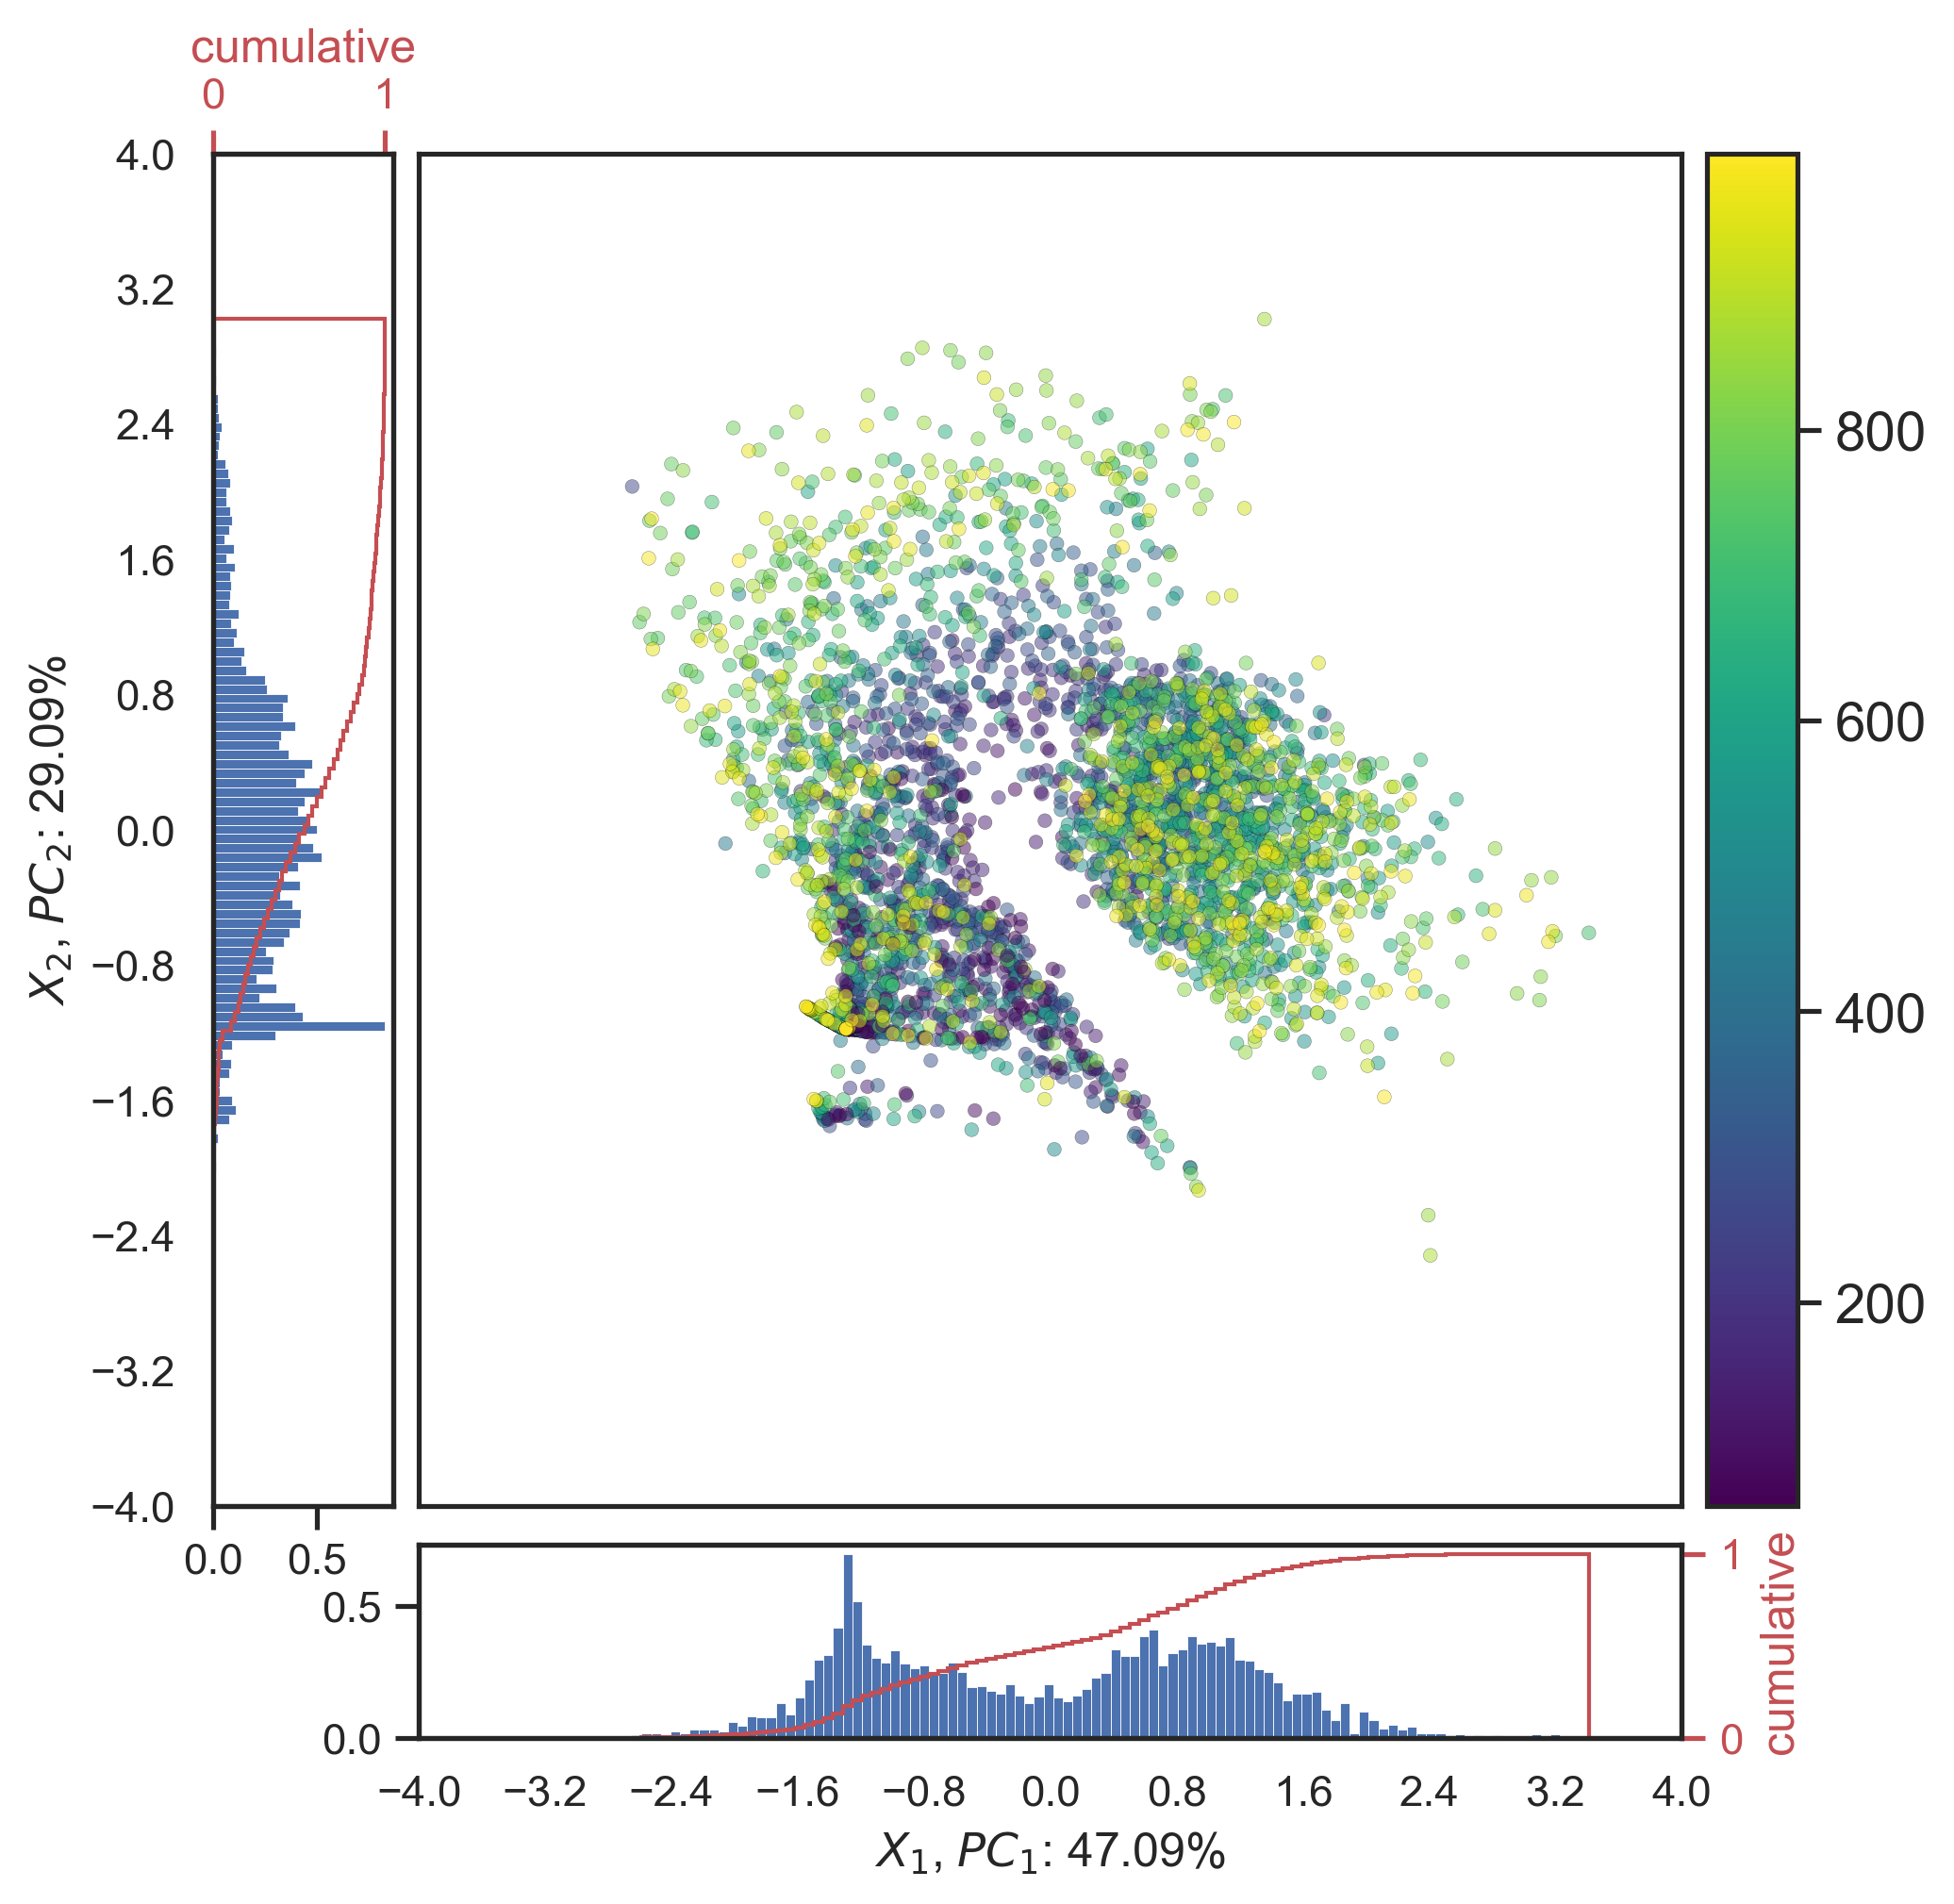

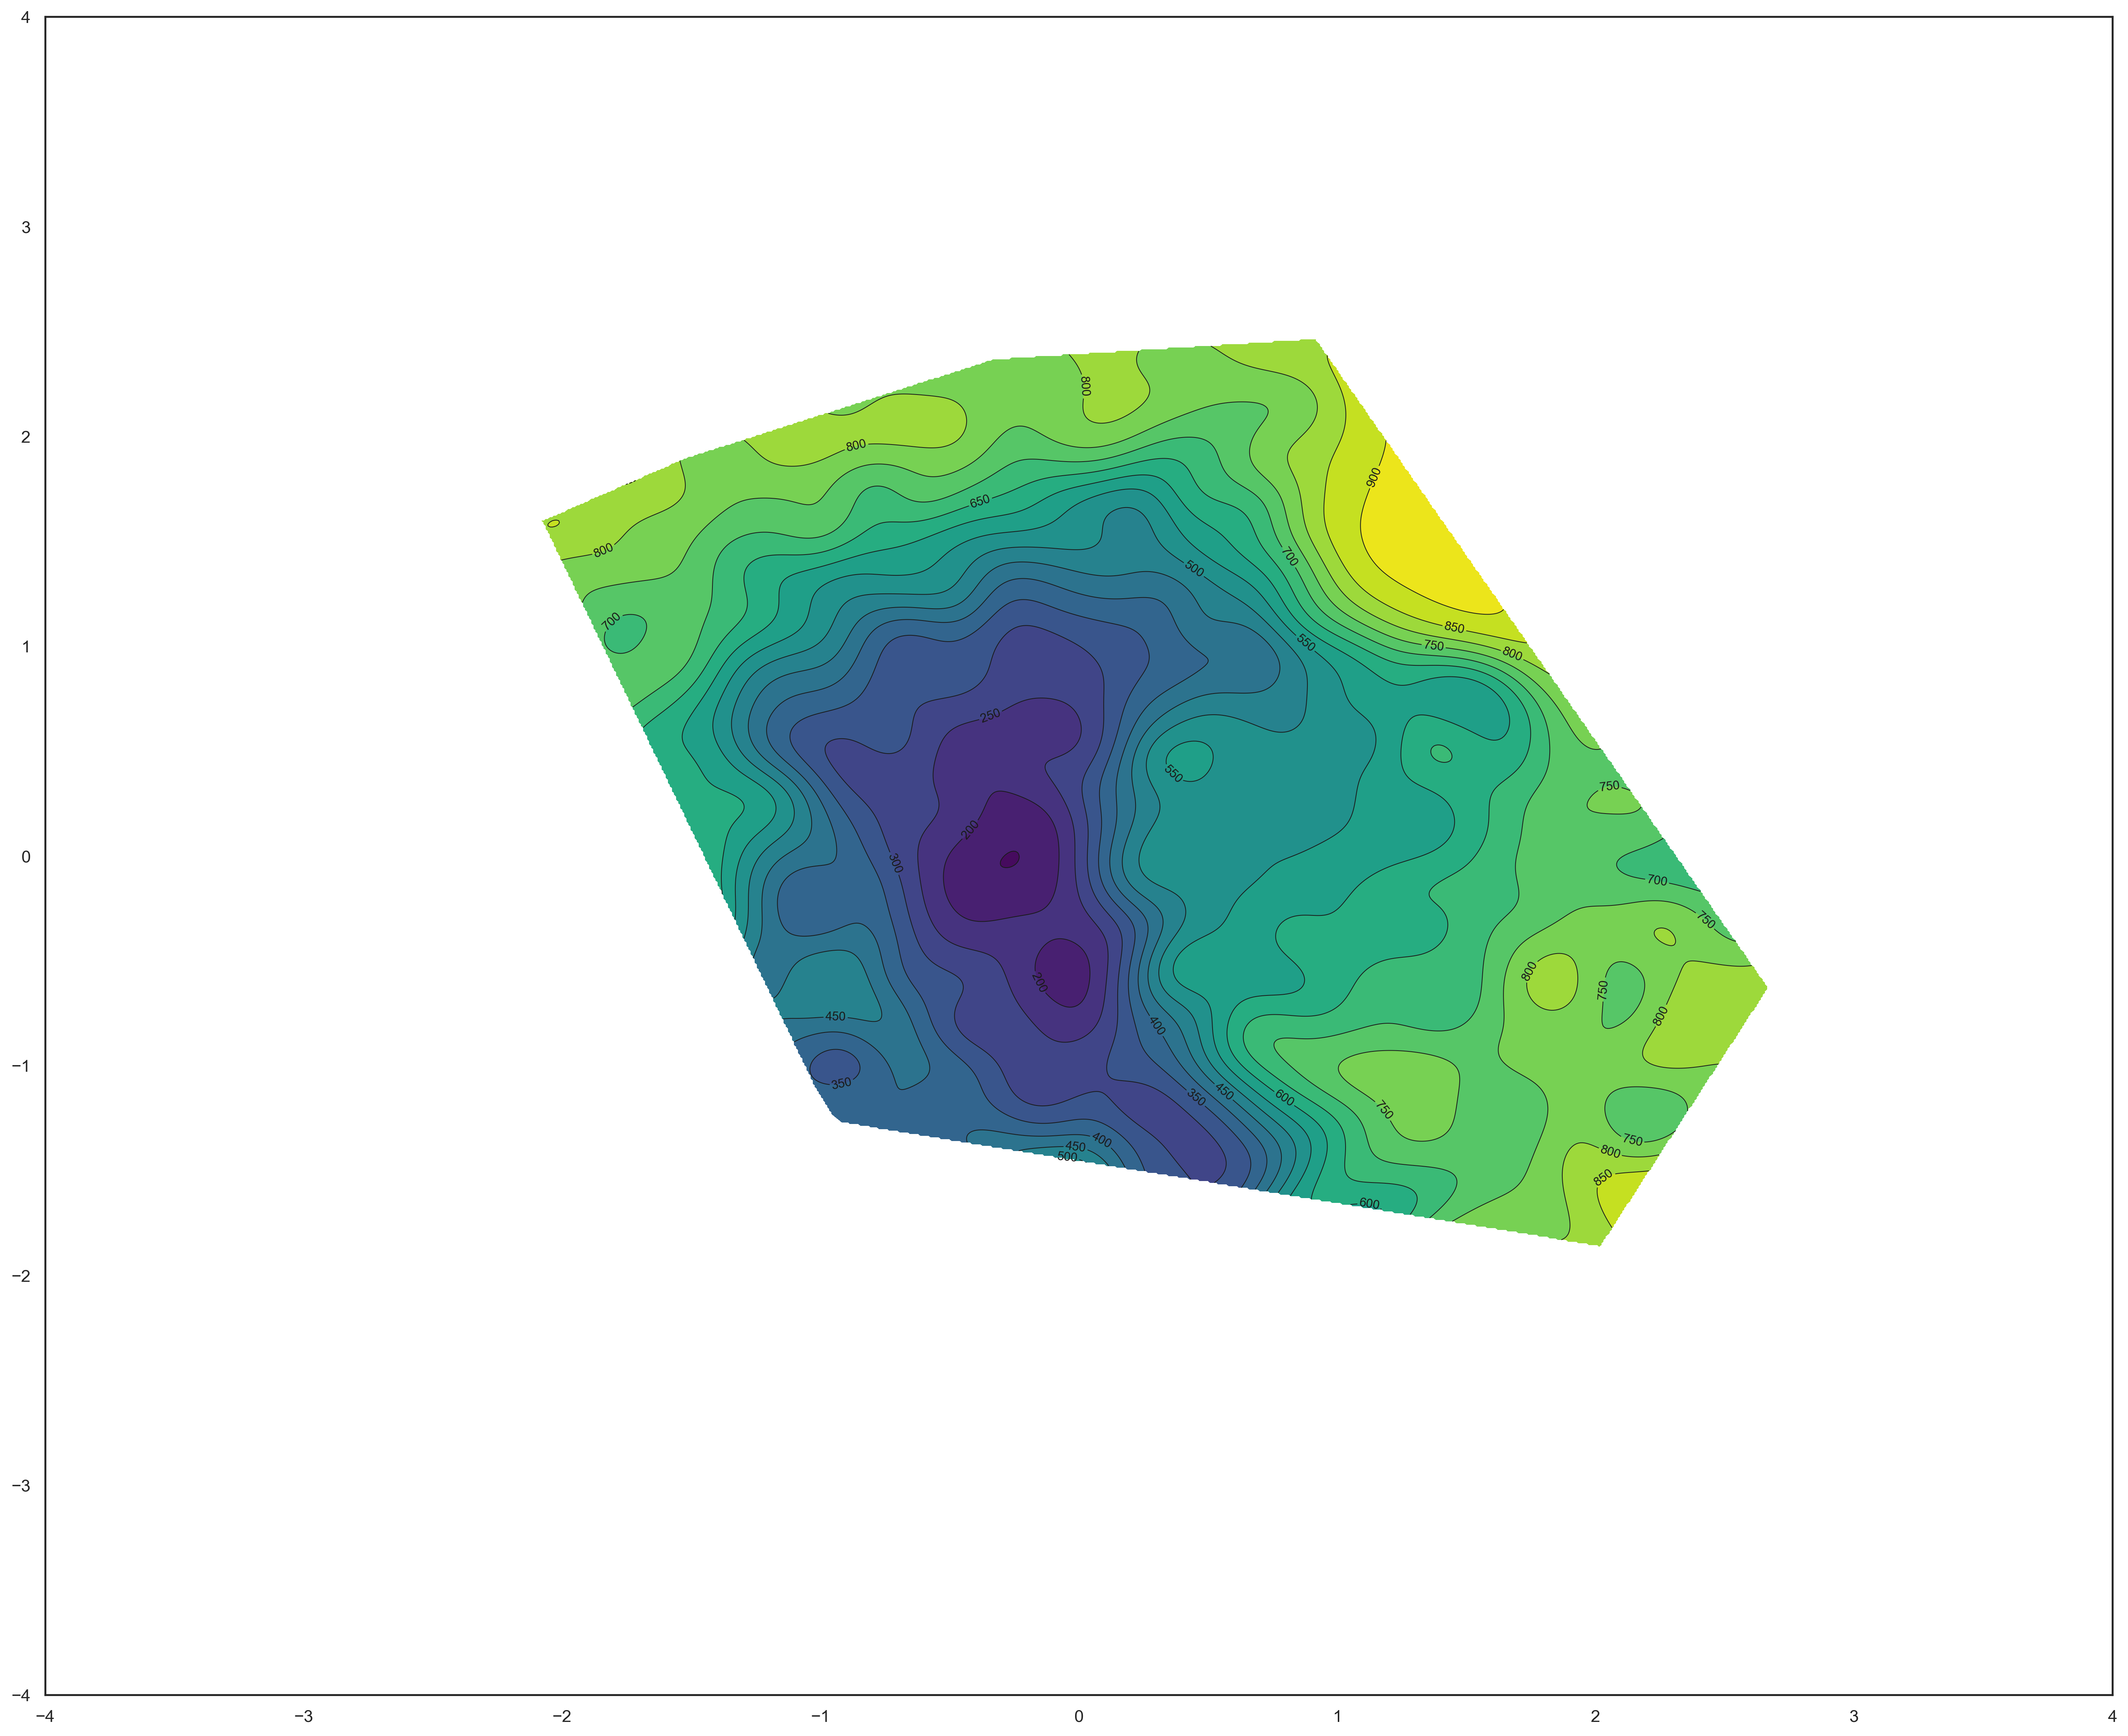

In [122]:
from specvae.metrics import eu_dist, cos_sim, per_diff
from matplotlib.cm import get_cmap

# vis_label = 'collision_energy'
vis_label = 'total_exact_mass'

label = 'total_exact_mass'
# label = 'collision_energy'

# interplolator = 'matplotlib'
interpolator = 'scipy'
show_intersection_plot = False
show_contour_plot = True
select_subset = False
subset = []
# cmap = 'Reds'
cmap = 'viridis'
# cmap = 'magma'
# cmap = 'Set1'
set_range = True
pca = True
dim1, dim2 = 0,1 # applies only when pca is False
# dim1, dim2 = 2, 1 # applies only when pca is False
xlim=(-10, 8)
ylim=(0., 1.)
it_subset = [1, 0, 7, 2, 10, 17]

for path in model_dirs:
    model = load_model(path)
    df = load_vis_data(vis_label)

    # if label == 'collision_energy':
    df = df[(df['collision_energy'] >= 0) & (df['collision_energy'] <= 100)]

    data = preload_data_as_tensor(model, df)
    data_np = evaluate_model(model, df, data)

    if data_np['model_type'] == 'betavae':
        if select_subset:
            df = df[df[label].isin(subset)]
        colors = get_colors(df, data_np)
        n_dim = data_np['z'].shape[1]
        std_ = np.std(data_np['z'], axis=0)

        label_value = df[label].to_numpy()
        beta = model.config['beta']
        print('Path:', path)
        print('Beta:', beta)
        xlabel, ylabel = 'X', 'Y'
        if pca and n_dim > 2:
            pca2_data, r = compute_pca(data_np['z'], n=2)
            x, y = pca2_data[:,0], pca2_data[:,1]
            evr = r.explained_variance_ratio_
            xlabel, ylabel = '$X_{1}$, $PC_{1}$: %.2f%%' % (evr[0] * 100.), '$X_{2}$, $PC_{2}$: %.2f%%' % (evr[1] * 100.)
        elif pca == False and n_dim > 2:
            x, y = data_np['z'][:,dim1], data_np['z'][:,dim2]
            xlabel, ylabel = '$X_{%d}$, $std_{%d}$: %.3f' % (dim1+1, dim1+1, std_[dim1]), '$X_{%d}$, $std_{%d}$: %.3f' % (dim2+1, dim2+1, std_[dim2])
        elif n_dim == 2:
            x, y = data_np['z'][:,0], data_np['z'][:,1]
            xlabel, ylabel = '$X_{1}$, $std_{1}$: %.3f' % (std_[0]), '$X_{2}$, $std_{2}$: %.3f' % (std_[1])
        
        if set_range:
            fig = plot_latent(x, y, label_value, scale_size=50.0, cmap=cmap, 
                alpha=0.5, figsize=(7,7), dpi=300, xlabel=xlabel, ylabel=ylabel, xlim=(-4, 4), ylim=(-4, 4))
        else:
            # color = df[label.replace('_id', '')].to_numpy()
            fig = plot_latent(x, y, label_value, scale_size=50.0, cmap=cmap, 
                alpha=0.5, figsize=(7,7), dpi=300, xlabel=xlabel, ylabel=ylabel)
        
        z = np.zeros((x.shape[0], 2))
        z[:,0], z[:,1] = x, y
        plt.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}.png')
        plt.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}.svg')

        if show_intersection_plot:
            y_value = 0.0
            dd = 0.1
            # Select points on the line y=y_value with proximity dd:
            idx = np.logical_and(y <= (y_value + dd), y >= (y_value - dd))
            # Find corresponding label values:
            selected_labels = label_value[idx]
            selected_x = x[idx]

            from scipy.ndimage.filters import gaussian_filter1d
            x_srt_idx = np.argsort(selected_x)
            selected_x = selected_x[x_srt_idx]
            selected_labels = selected_labels[x_srt_idx]
            selected_labels_s = gaussian_filter1d(selected_labels, sigma=15)
            mean = selected_labels_s
            std = np.abs(selected_labels - selected_labels_s) * np.sqrt(2.)
            upper_err = gaussian_filter1d(mean + std/2, sigma=15)
            lower_err = gaussian_filter1d(mean - std/2, sigma=15)

            fig, axs = plt.subplots(dpi=300)
            c = 'b' if label == 'total_exact_mass' else 'r'
            sns.lineplot(x=selected_x, y=mean, ax=axs, ls='-', color=c, lw=3)
            sns.lineplot(x=selected_x, y=upper_err, ax=axs, ls='-', color=c, alpha=0.25)
            axs.fill_between(selected_x, upper_err, lower_err, color=c, alpha=0.2)
            sns.lineplot(x=selected_x, y=lower_err, ax=axs, ls='-', color=c, alpha=0.25)
            plt.grid()
            axs.set_xlim(-4, 4)
            fig.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}-y_value{y_value}-dd{dd}.png')
            fig.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}-y_value{y_value}-dd{dd}.svg')
            plt.show()

        if show_contour_plot:
            ngridx = 1000
            ngridy = 1000
            xi = np.linspace(-4.0, 4.0, ngridx)
            yi = np.linspace(-4.0, 4.0, ngridy)

            # matplotlib
            if interpolator == 'matplotlib':
                import matplotlib.tri as tri
                triang = tri.Triangulation(x, y)
                interpolator = tri.LinearTriInterpolator(triang, label_value)
                # interpolator = tri.CubicTriInterpolator(triang, label_value, kind='geom')
                Xi, Yi = np.meshgrid(xi, yi)
                zi = interpolator(Xi, Yi)

            # scipy
            if interpolator == 'scipy':
                from scipy.interpolate import griddata
                zi = griddata((x, y), label_value, (xi[None,:], yi[:,None]), method='linear')

            from scipy.ndimage.filters import gaussian_filter
            zi = gaussian_filter(zi, sigma=15.0)

            fig, axs = plt.subplots(dpi=300)
            contours = plt.contour(xi, yi, zi, levels=15, linewidths=0.5, colors='k')
            plt.clabel(contours, inline=True, fontsize=8)
            plt.contourf(xi, yi, zi, levels=15, cmap=cmap)

            fig.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}-contour.png')
            fig.savefig(f'../.img/latent/{dataset}-betavae-set{int(set_range)}-beta{beta}-{label}-contour.svg')
            plt.show()
            # # plt.imshow(zi, extent=[0, 1, 0, 1], origin='lower', cmap=cmap, alpha=1.0)
            # # plt.tricontour(x, y, label_value, levels=100, linewidths=0.5, colors='k')
            # # cntr2 = plt.tricontourf(x, y, label_value, levels=100, cmap="RdBu_r")
    
    elif data_np['model_type'] == 'jointvae':
        # df = df_all
        # df.dropna(subset=[label], inplace=True)

        if select_subset:
            df = df[df[label].isin(subset)]
        df = df[df['instrument_type_id'].isin(it_subset)]
        df['instrument_type_id_map'] = df.apply(lambda row: it_subset.index(row['instrument_type_id']), axis=1)

        data_all = preload_data_as_tensor(model, df)
        data_np = evaluate_model(model, df, data_all)
        Z = data_np['z']
        latent_spec = model.config['latent_spec']
        cont_dim = latent_spec['cont']
        disc_dims = latent_spec['disc']
        cont_Z = Z[:,:cont_dim]
        disc_Zs = [Z[:,cont_dim + dim1:cont_dim + dim1 + dim2] for dim1, dim2 in zip([0] + disc_dims, disc_dims)]
        assert(np.array_equal(Z, np.hstack((cont_Z, *disc_Zs))))
        print(cont_Z.shape)
        for disc_Z in disc_Zs:
            y = np.argmax(disc_Z, axis=1)
            print(disc_Z.shape, np.unique(y))

        print('KDE per combination of labels obtained from JointVAE')
        # fig = dicrete_plot(cont_Z, disc_Zs, kind='kde', scale=1., unitv=0.75, sunith=0.4, unith=1., 
        #     legend_offset=2.5, enable_minor_grid=False, xlim=xlim, ylim=ylim, set_ylim=True)
        fig = dicrete_plot(cont_Z, disc_Zs, color=data_np[label], kind='strip', scale=1., unitv=0.75, sunith=0.4, unith=1., 
            legend_offset=2.5, enable_minor_grid=False, xlim=(-14, 10), ylim=(-0.4,0.6), set_ylim=True)
        plt.show()

        y_trues = [np.eye(2)[data_np['ionization_mode_id']], 
            np.eye(6)[df['instrument_type_id_map'].to_numpy()]]
        for yt in y_trues:
            y = np.argmax(yt, axis=1)
            print(yt.shape, np.unique(y))

        print('KDE per combination of ground truth labels')
        fig1 = dicrete_plot(cont_Z, y_trues, color=data_np[label], labels={
                'ionization_mode': ['negative', 'positive'], 
                'instrument_type': [df['instrument_type'][df['instrument_type_id'] == itid].unique()[0] for itid in it_subset]
            }, kind='strip', scale=1., unitv=0.75, sunith=0.4, unith=1., 
            legend_offset=2.5, enable_minor_grid=False, xlim=(-14, 10), ylim=(-0.4,0.6), set_ylim=True)
        plt.show()
        z = cont_Z

    # cm = eu_dist(torch.from_numpy(z), torch.from_numpy(z), matrix=True).detach().numpy()
    # sns.clustermap(cm, cmap='coolwarm_r', row_cluster=True)
    plt.show()
